C:\Users\AngZhou\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(540L, 2500L) (540L,)


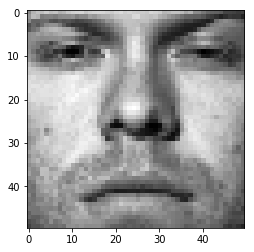

C:\Users\AngZhou\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(100L, 2500L) (100L,)


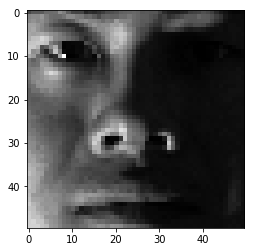

In [1]:
## Problem 1
# (b) Load the training set into a matrix X: there are 540 training images in total, each has 50×50 pixels that need to be
#     concatenated into a 2500-dimensional vector. So the size of X should be540×2500,where each row is a ﬂattened face image. 
#     Pick a face image from X and display that image in grayscale. Do the same thing for the test set. 
#     The size of matrix X_test for the test set should be 100×2500. 
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print train_data.shape, train_labels.shape

plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print test_data.shape, test_labels.shape

plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()


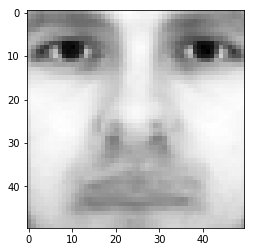

array([59.25185185, 56.10185185, 52.42222222, ..., 67.22222222,
       64.61851852, 59.27592593])

In [2]:
# (c) Average Face. Compute the average face µ from the whole training set by summing up every column in X then dividing 
#     by the number of faces. Display the average face as a grayscale image.

train_mean = train_data.mean(0)
plt.imshow(train_mean.reshape(50,50), cmap = cm.Greys_r)
plt.show()
train_mean

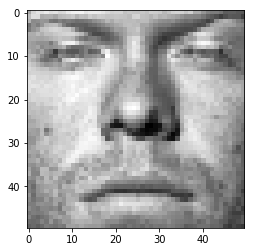

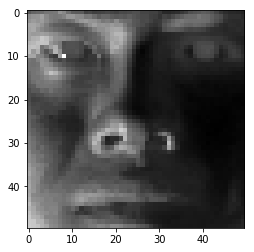

In [3]:
# (d) Mean Subtraction. Subtract average face µ from every column in X. That is, x_i := x_i−µ, where x_i is the
#     i-th column of X. Pick a face image after mean subtraction from the new X and display that image in grayscale. 
#     Do the same thing for the test set Xtest using the precomputedaverageface µ in(c). 
train_diff = train_data - train_mean
plt.imshow(train_diff[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()
test_diff = test_data - train_mean
plt.imshow(test_diff[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [4]:
(U,s,Vh) = np.linalg.svd(train_data,full_matrices=False, compute_uv=True)

print U.shape
print s.shape
print Vh.shape

(540L, 540L)
(540L,)
(540L, 2500L)


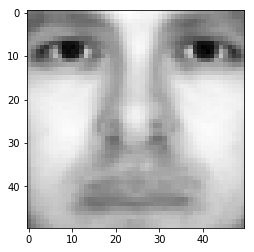

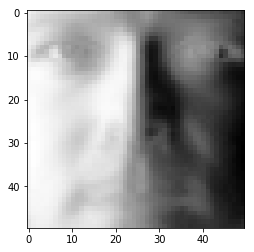

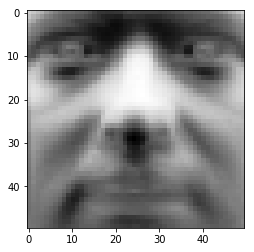

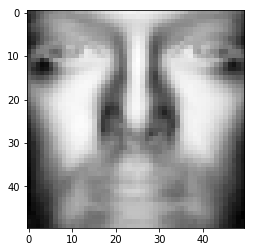

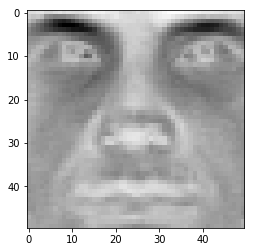

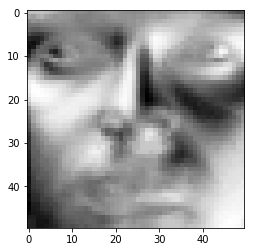

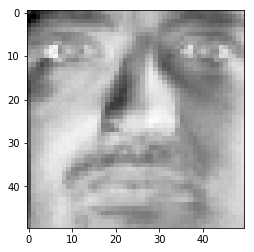

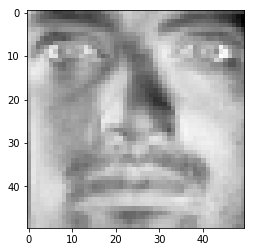

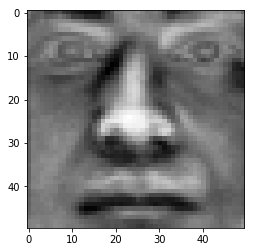

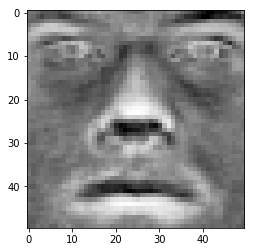

In [5]:
# (e) Eigenface. Perform Singular Value Decomposition (SVD) on training set X (X=UΣVT) to get matrix VT (V transpose), 
#     where each row of VT has the same dimension as the face image. We refer to v_i, the i-th row of VT, as i-th eigenface. 
#     Display the ﬁrst 10 eigenfaces as 10 images in grayscale. 
%matplotlib inline
for i in range(10):
    plt.imshow(-Vh[i, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

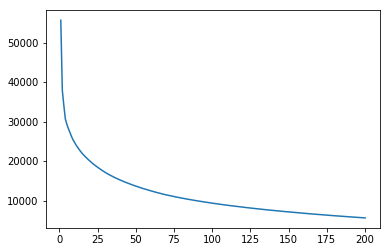

In [6]:
# (f) Low-rank Approximation. Since Σ is a diagonal matrix with non-negative real numbers on the diagonal in 
#     non-ascending order, we can use the ﬁrst r elements in Σ together with ﬁrst r columns in U and ﬁrst r rows in VT to 
#     approximate X. That is, we can approximate X by Xr' =U[:,:r]Σ[:r,:r]VT[:r,:]. The matrix Xr' is called rank-r 
#     approximation of X. Plot the rank-r approximation error ||X−Xr'||F (the Frobenius Norm of a matrix) as a function of r
#     when r = 1,2,...,200.
A=[]
def print_by_R(r):
    Xr=np.dot(np.dot(U[:,:r],np.diag(s)[:r,:r]),Vh[:r,:])
    return np.linalg.norm(train_data-Xr)
    
for i in range(1,201):
    A.append(print_by_R(i))

plt.plot(range(1,201),A)

In [7]:
# (g) Eigenface Feature. The top r eigenfaces VT[: r,:] = {v1,v2,...,vr}T span an r-dimensional linear subspace of the
#     original image space called face space, whose origin is the average face µ, and whose axes are the eigenfaces 
#     {v1,v2,...,vr}. Therefore, using the top r eigenfaces {v1,v2,...,vr}, we can represent a 2500-dimensional face 
#     image z as an r-dimensional feature vector f: f=VT[:r,:]z=[v1,v2,...,vr]Tz. Write a function to generate r-dimensional 
#     feature matrix F and F_test for training images X and test images X_test, respectively (to get F, multiply X to the 
#     transpose of ﬁrst r rows of VT, F should have same number of rows as X and r columns; similarly for X_test). 
def r_space_face(X,Vh,r):
    return np.dot(X,np.transpose(Vh[:r,:]))

print r_space_face(train_data,Vh,4)
print r_space_face(test_data,Vh,4)

[[-4.74967376e+02  2.17973968e+02 -1.70961814e+02  1.70905220e+02]
 [-5.65563380e+03  9.01983289e+02  7.94461758e+02 -1.23932887e+02]
 [-6.04124173e+03 -1.29854205e+00 -1.75008144e+02 -7.37873210e+02]
 ...
 [-5.48378327e+03 -1.78398379e+03  5.31020832e+02 -3.53278760e+02]
 [-1.12355710e+03 -3.52854604e+02 -3.59342770e+02  5.85091058e+02]
 [-5.26189590e+03 -2.84122673e+03 -1.06175093e+03 -6.57870366e+02]]
[[-5.61217671e+03  7.26842598e+01 -1.12514470e+03 -1.05810987e+03]
 [-4.38148365e+03 -1.74112499e+03  8.25145336e+02  3.28969057e+02]
 [-7.46787548e+02 -2.44424666e+02 -2.93783142e+02  3.83295548e+02]
 [-8.42246582e+02  7.86392230e+01 -8.22570335e+02 -5.76897512e+01]
 [-6.55330481e+03  1.37026355e+03  1.78920090e+02 -5.28209931e+02]
 [-4.19778468e+03 -3.07755355e+03 -4.74685093e+02  1.80815810e+02]
 [-3.95135520e+03  8.07016312e+02  1.21068695e+03  3.76053162e+02]
 [-3.30968170e+03  1.90969904e+03  8.86766393e+02  7.42241866e+02]
 [-5.31115815e+03 -1.00403384e+03  7.70599549e+02 -7.041

In [8]:
# (h) Face Recognition. Extract training and test features for r =10. Train a Logistic Regression model using F and 
#     test on F_test. Report the classiﬁcation accuracy on the test set. Plot the classiﬁcation accuracy on the test set as 
#     a function of r when r =1,2,...,200. Use “one-vs-rest” logistic regression, where a classiﬁer is trained for each 
#     possible output label. Each classiﬁer is trained on faces with that label as positive data and all faces with other 
#     labels as negative data. sklearn calls this “ovr” mode.
from sklearn.linear_model import LogisticRegression

def logisticRegrassion_Score(X_train,y_train,X_test,y_test,Vh,r):
    X_train_feature = r_space_face(X_train,Vh,r)
    X_test_feature = r_space_face(X_test,Vh,r)
    logreg = LogisticRegression(multi_class='ovr')
    logreg.fit(X_train_feature,y_train)
    y_test_pred = logreg.predict(X_test_feature)
    return (y_test_pred == y_test).sum()/float(y_test_pred.size)

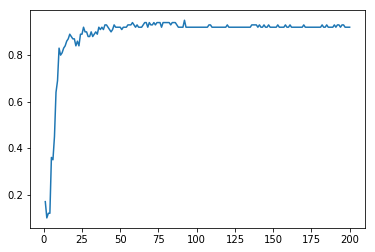

In [9]:
y=[]
for i in range(1,201):
    y.append(logisticRegrassion_Score(train_data,train_labels,test_data,test_labels,Vh,i))

plt.plot(range(1,201),y)

In [11]:
print 'done'

done
